In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

In [63]:
df = pd.read_csv("data/final.csv")
#pd.set_option('display.max_columns', None)

In [64]:
df = df.iloc[:, :31]

In [65]:
features = ['has_ip','url_len','is_short','nb_semico','nb_dslash','nb_slash','nb_colon',
 'nb_tilde','abn_sd','nb_sd','nb_dot','nb_at','nb_and','nb_equal','nb_excl',
 'nb_uscore','nb_hyphens','d_ratio','domain_s','domain_e','count_https','nb_hint', 'status_x']
df = df[features]

In [66]:
df['status_x'].replace(['legitimate', 'phishing'], [0, 1], inplace=True)

In [67]:
corr_matrix = df.corr()
corr_matrix["status_x"].sort_values(ascending=False)

status_x       1.000000
has_ip         0.321563
nb_hint        0.303722
nb_excl        0.294456
url_len        0.248493
nb_slash       0.242411
nb_equal       0.233446
d_ratio        0.224188
nb_dot         0.207474
nb_and         0.170632
nb_at          0.142436
abn_sd         0.127593
nb_sd          0.112242
is_short       0.105989
nb_semico      0.103361
nb_colon       0.092926
nb_dslash      0.072676
count_https    0.056871
nb_uscore      0.037187
nb_tilde       0.030156
nb_hyphens    -0.099352
domain_e      -0.174705
domain_s      -0.369650
Name: status_x, dtype: float64

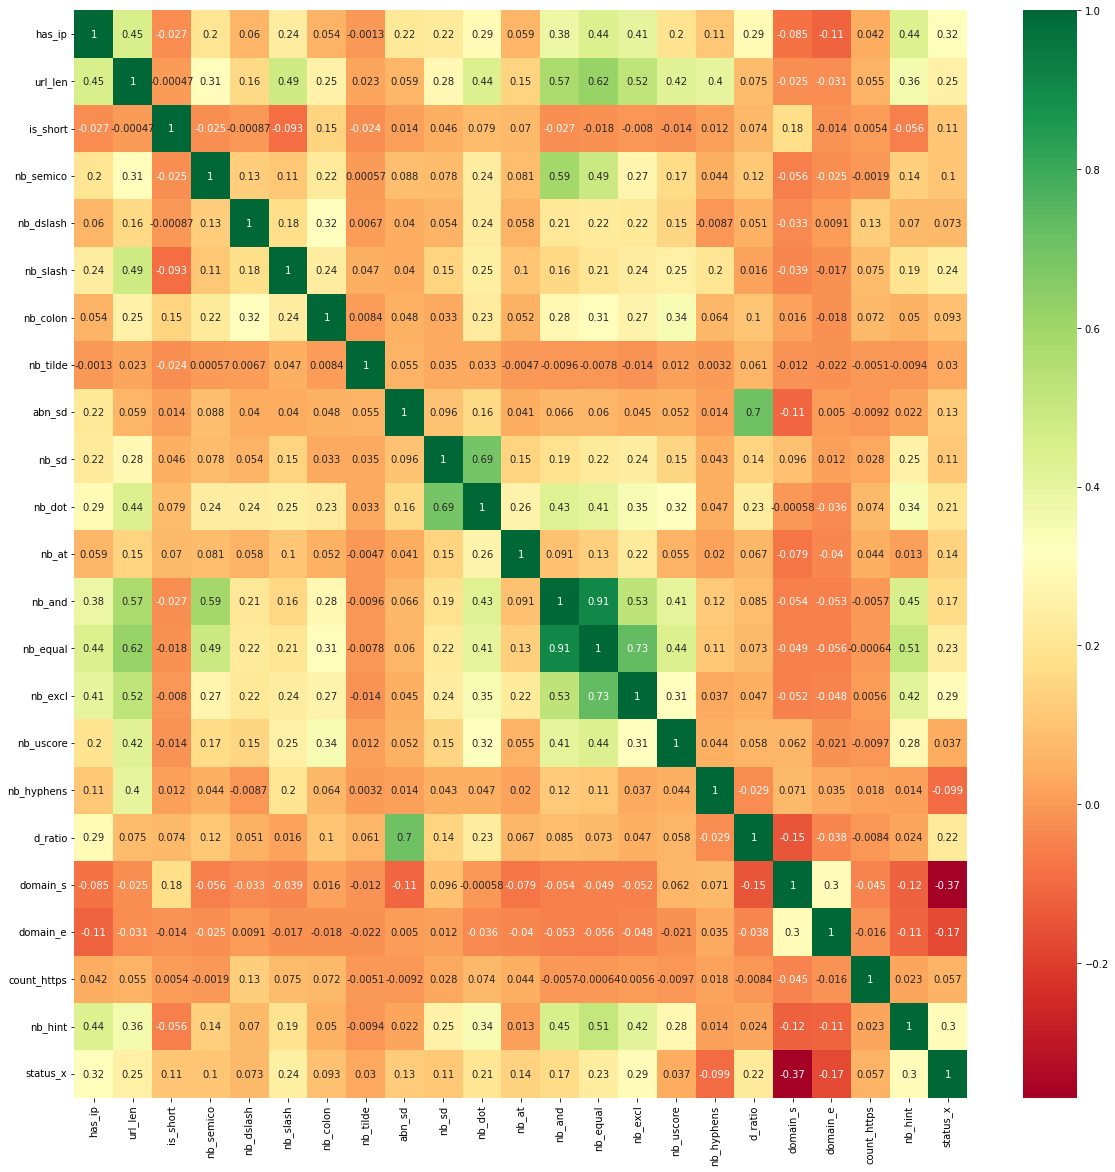

In [68]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [69]:
def outlier(col, df):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    print(f"The outliers in {col} feature are values << {lower_bound} and >> {upper_bound}")
    minimum = df[col].min()
    maximum = df[col].max()
    print(f"The minimum value in {col} is {minimum} and maximum value is {maximum}")
    df[col] = np.where(df[col]>upper_bound,upper_bound,df[col])
outlier("url_len", df)

The outliers in url_len feature are values << -24.0 and >> 128.0
The minimum value in url_len is 12 and maximum value is 1641


In [70]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
# sacling -1. ile 1 arasında olmalı 0,1 değil
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                        ("std_scaler", StandardScaler())
                        ])

In [74]:
X_trainp = num_pipeline.fit_transform(X_train)
X_testp = num_pipeline.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_trainp, y_train)

LogisticRegression(random_state=0)

In [76]:
model.score(X_trainp, y_train)

0.8136406176883482

In [77]:
model.score(X_testp, y_test)

0.8028070175438596

In [78]:
n_features = X_trainp.shape[1]
# define model
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [79]:
#decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(0.01, 10000, 0.95,  staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(X_trainp, y_train, epochs=80, batch_size=64, verbose=2, validation_data=(X_testp, y_test))#, callbacks=[earlyStopping, checkpoint]) #, reduce_lr_loss])

Epoch 1/80


2022-08-31 17:14:18.032875: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


134/134 - 1s - loss: 0.4439 - accuracy: 0.7877 - val_loss: 0.3781 - val_accuracy: 0.8284 - 1s/epoch - 10ms/step
Epoch 2/80
134/134 - 0s - loss: 0.3905 - accuracy: 0.8266 - val_loss: 0.3551 - val_accuracy: 0.8386 - 129ms/epoch - 959us/step
Epoch 3/80
134/134 - 0s - loss: 0.3722 - accuracy: 0.8380 - val_loss: 0.3332 - val_accuracy: 0.8558 - 123ms/epoch - 919us/step
Epoch 4/80
134/134 - 0s - loss: 0.3602 - accuracy: 0.8449 - val_loss: 0.3379 - val_accuracy: 0.8488 - 122ms/epoch - 908us/step
Epoch 5/80
134/134 - 0s - loss: 0.3529 - accuracy: 0.8455 - val_loss: 0.3252 - val_accuracy: 0.8575 - 122ms/epoch - 907us/step
Epoch 6/80
134/134 - 0s - loss: 0.3429 - accuracy: 0.8511 - val_loss: 0.3182 - val_accuracy: 0.8625 - 122ms/epoch - 912us/step
Epoch 7/80
134/134 - 0s - loss: 0.3485 - accuracy: 0.8506 - val_loss: 0.3195 - val_accuracy: 0.8537 - 121ms/epoch - 904us/step
Epoch 8/80
134/134 - 0s - loss: 0.3404 - accuracy: 0.8559 - val_loss: 0.3120 - val_accuracy: 0.8677 - 122ms/epoch - 911us/step

Epoch 66/80
134/134 - 0s - loss: 0.2781 - accuracy: 0.8858 - val_loss: 0.2978 - val_accuracy: 0.8702 - 120ms/epoch - 893us/step
Epoch 67/80
134/134 - 0s - loss: 0.2827 - accuracy: 0.8825 - val_loss: 0.2974 - val_accuracy: 0.8737 - 119ms/epoch - 890us/step
Epoch 68/80
134/134 - 0s - loss: 0.2833 - accuracy: 0.8796 - val_loss: 0.2999 - val_accuracy: 0.8723 - 119ms/epoch - 890us/step
Epoch 69/80
134/134 - 0s - loss: 0.2760 - accuracy: 0.8844 - val_loss: 0.3019 - val_accuracy: 0.8719 - 118ms/epoch - 884us/step
Epoch 70/80
134/134 - 0s - loss: 0.2807 - accuracy: 0.8800 - val_loss: 0.2980 - val_accuracy: 0.8744 - 119ms/epoch - 889us/step
Epoch 71/80
134/134 - 0s - loss: 0.2769 - accuracy: 0.8835 - val_loss: 0.3003 - val_accuracy: 0.8733 - 119ms/epoch - 889us/step
Epoch 72/80
134/134 - 0s - loss: 0.2738 - accuracy: 0.8869 - val_loss: 0.2990 - val_accuracy: 0.8695 - 119ms/epoch - 888us/step
Epoch 73/80
134/134 - 0s - loss: 0.2761 - accuracy: 0.8831 - val_loss: 0.2989 - val_accuracy: 0.8712 - 1

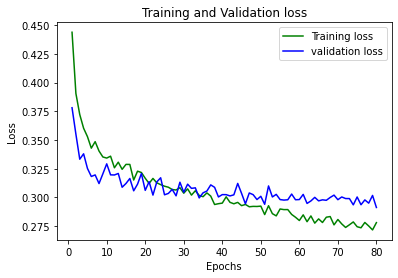

In [81]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,81)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
result = model.predict(X_testp)

90/90 [==============================] - 0s 337us/step


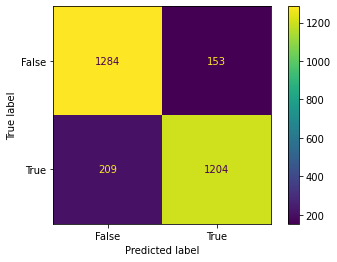

In [83]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, result.round())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

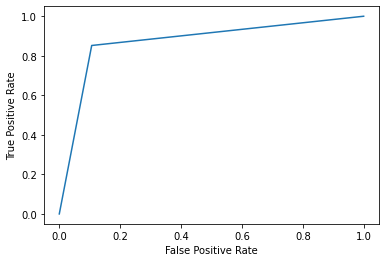

In [84]:
fpr, tpr, _ = metrics.roc_curve(y_test, result.round())

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
def build_model(hp):
    n_features = X_trainp.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=256, step=32),
                    activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1,)))

    for i in range(hp.Int("l_layers", min_value=3, max_value=6)):
        model.add(Dense(units=hp.Int(f'unit_{i}', min_value=32, max_value=256, step=32),
                        activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1,)))

    model.add(Dense(1, activation='sigmoid'))
    model.add(BatchNormalization())
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-3, max_value=1e-2,
                                                  sampling='LOG', default=1e-3)),
                 loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [31]:
def random_tuner():
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=60,
        executions_per_trial=2,
        directory='random_search',
        project_name='url_8'
    )

    tuner.search(x=X_trainp,
                 y=y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_testp, y_test))
    
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.fit(X_trainp, y_train, epochs=40, batch_size=64, verbose=2, validation_data=(X_testp, y_test))
    tuner.get_best_hyperparameters()[0].values

In [87]:
from pickle import dump

In [85]:
model.save("output/fast_model.h5")

In [89]:
dump(num_pipeline, open('output/fast_pipeline.pkl', 'wb'))